## Gradient Boosting

Gradient boosting, like AdaBoost, is an ensemble method that works sequentially. In contrast to AdaBoost, gradient boosting does not seek to minimize errors by adjusting the weight of the errors. Instead, it follows this process:.

1. A small tree (called a stump) is added to the model, and the errors are evaluated.
2. A second stump is added to the first and attempts to minimize the errors from the first stump. These errors are called pseudo-residuals.
3. A third stump is added to the first two and attempts to minimize the pseudo-residuals from the previous two.
4. The process is repeated until the errors are minimized as much as possible, or until a specified number of repetitions has been reached:

In gradient boosting, the learning rate refers to how aggressively pseudo-residuals are corrected during each iteration. In general, it is preferable to begin with a lower learning rate and, if necessary, adjust the rate upward.

Gradient boosting is a powerful technique that is often used in machine learning competitions.

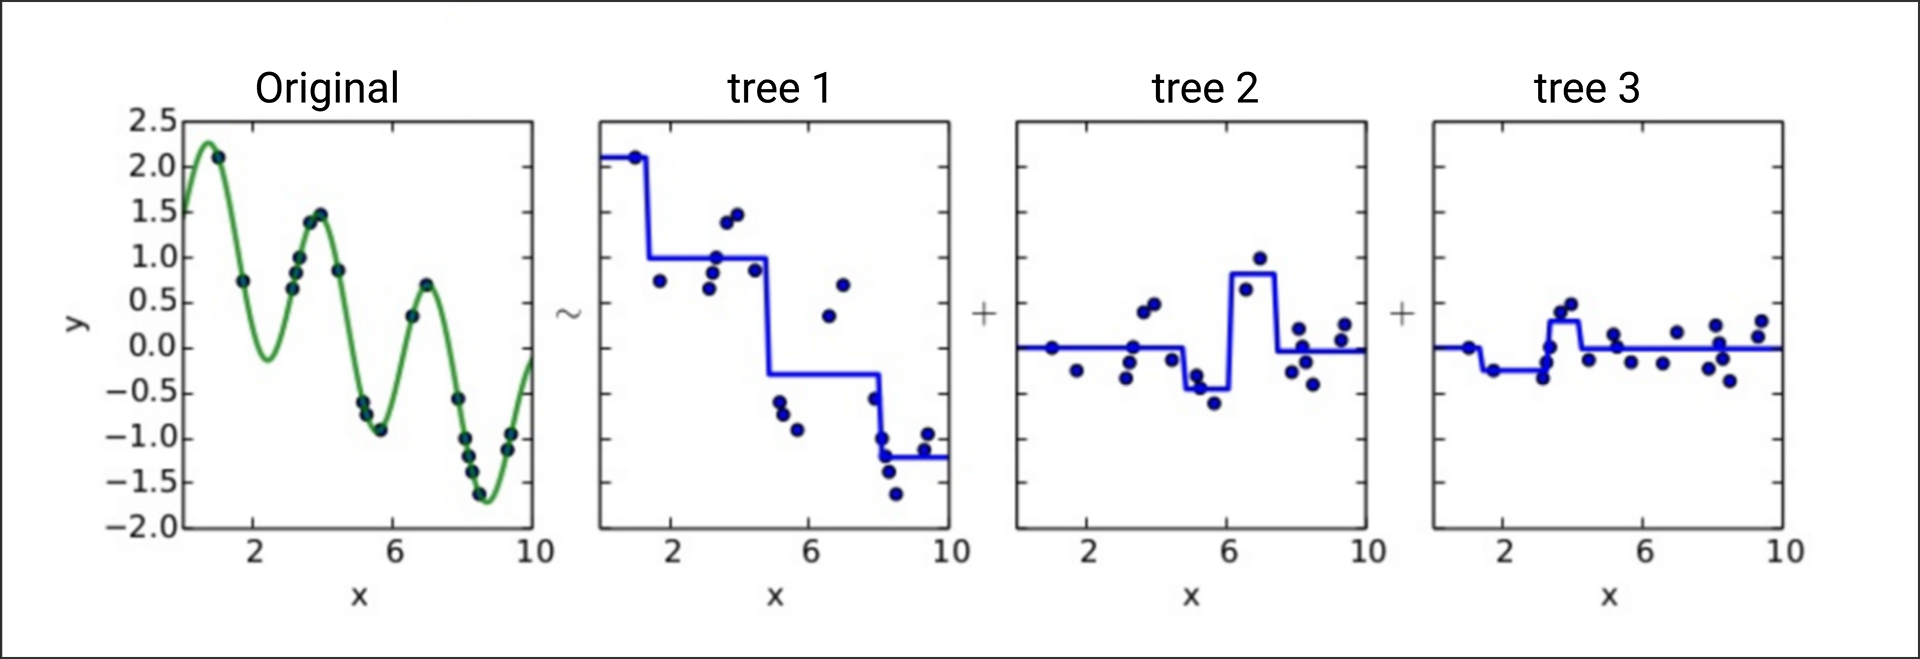

# Preprocessing

In [1]:
import pandas as pd
from path import Path
# Load data
file_path = Path("../Resources/loans_data_encoded.csv")
loans_df = pd.read_csv(file_path)
loans_df.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [2]:
# Define features set
X = loans_df.copy()
X = X.drop("bad", axis=1)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [3]:
# Define target vector
y = loans_df["bad"].values

In [4]:
# Next, split the dataset into training and testing sets. Again, the random_state argument is optional.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=1)

#### Scaling
The data is scaled in the next step. Scaling is typically necessary when using models that calculate distances between data points, such as SVM. While not strictly required for tree-based models, it can be a good idea to scale the data, especially when comparing the performances of different models.

In [5]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

  ### Choose best learning rate

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.629
Accuracy score (validation): 0.512

Learning rate:  0.1
Accuracy score (training): 0.656
Accuracy score (validation): 0.520

Learning rate:  0.25
Accuracy score (training): 0.723
Accuracy score (validation): 0.536

Learning rate:  0.5
Accuracy score (training): 0.755
Accuracy score (validation): 0.560

Learning rate:  0.75
Accuracy score (training): 0.781
Accuracy score (validation): 0.520

Learning rate:  1
Accuracy score (training): 0.797
Accuracy score (validation): 0.472



## Overfitting 

A model that performs well on the training set but poorly on the testing set is said to be “overfit.” Overfitting is akin to memorizing the answers to an exam: It will help on that particular exam, but not on any others. In other words, overfitting occurs when a model gives undue importance to patterns within a particular dataset that are not found in other, similar datasets. Instead of learning a general pattern that can be applied to other similar datasets, it learns the patterns specific to one dataset.

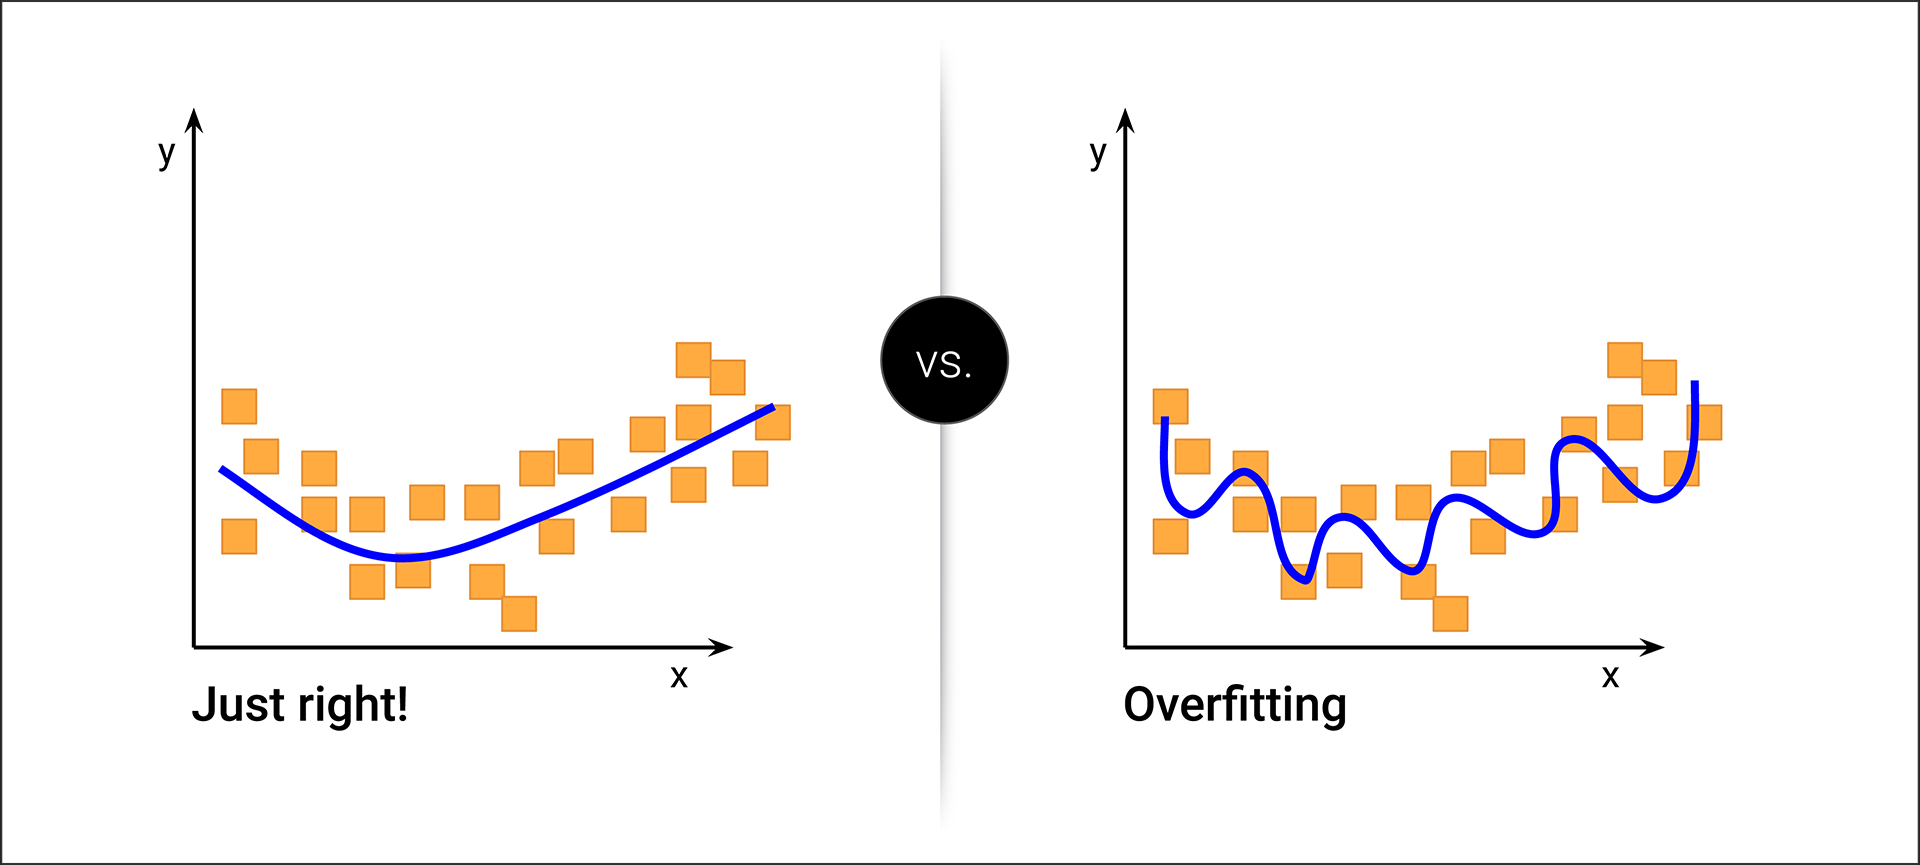

  ## Create Gradient Boosting Classifier

In [9]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.5,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train)

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(20)

,Prediction,Actual
0,0,1
1,0,1
2,0,0
3,1,0
4,0,1
5,1,1
6,0,1
7,0,0
8,0,0
9,0,0


  ### Evaluate the model

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.56


In [11]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,49,16
Actual 1,39,21


In [12]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        65
           1       0.57      0.35      0.43        60

    accuracy                           0.56       125
   macro avg       0.56      0.55      0.54       125
weighted avg       0.56      0.56      0.54       125

